In [3]:
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')

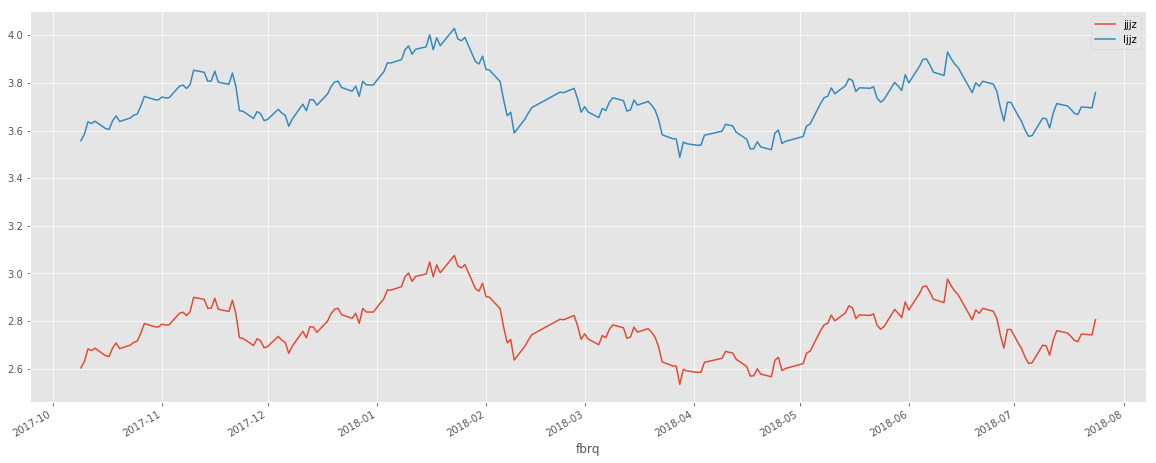

In [7]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

BASE_URL = 'http://stock.finance.sina.com.cn/fundInfo/api/openapi.php'
API_FUND_HISTORY = 'CaihuiFundInfoService.getNav'

def get_fund_data_page(symbol, date_from, date_to, page):

    full_path = '{0}/{1}?symbol={2}&datefrom={3}&dateto={4}&page={5}'.format(
        BASE_URL,
        API_FUND_HISTORY,
        symbol,
        date_from,
        date_to,
        page)

    r = requests.get(full_path)
    content = r.json()

    if content['result']['status']['code'] != 0:
        raise Exception('response status error!')

    data = content['result']['data']
    return data


def get_fund_data(symbol, date_from, date_to):
    page = 1
    total_data = []

    while True:

        data = get_fund_data_page(symbol, date_from, date_to, page)
        total_data.append(pd.DataFrame(data['data'], dtype=float))
        page += 1
        if data['data'] is None:
            break

    return total_data

frames = get_fund_data('180012', date_from='2017-10-01', date_to='2018-07-25')
result = pd.concat(frames)
result = result.drop_duplicates('fbrq')
result = result.set_index('fbrq')
result.index = pd.to_datetime(result.index)
result.plot(figsize=(20, 8))